In [ ]:
import os
os.chdir('/content/Shipping-and-time-estimation')
print(os.getcwd())  # Should show '/content/Shipping-and-time-estimation'



/content/Shipping-and-time-estimation


# Importing and loading the dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data =  pd.read_excel("/content/Shipping and time estimation .xlsx", )
data = pd.DataFrame(data)
data

,DATE,MEMBER_ID,TYPE,CURRENCY_OPT,STORE_REG,STORE_ID,STORE_TYPE,ORDER_ID,TRADING_ID,TOTAL PRODUCT,...,TAX_AMT,SHIP_AMT,INVENTORY_STATUS,ORDER_CREATED,ORDER_DEL_DATE,SHIPMENT_STATUS,TIME_RELEASED_SHIPPING,TIME_SHIPPED,TRACKING _ID,TRACKING_TIME
0,2017-08-01,ISDAQ001,TYPE 1,INR,SECTION 218,SECTION 218,RS,123001700IND1,OSDET125661500,5,...,0.15,114,A,2017-08-01,2017-08-06,P,12:00:00,14:00:00,632246135,3
1,2017-08-02,ISDAQ002,TYPE 2,INR,SECTION 218,SECTION 218,CS,123001700IND2,OSDET125661501,4,...,0.15,355,CFA,2017-08-02,2017-08-07,P,13:00:00,15:00:00,632246135,3
2,2017-08-03,ISDAQ003,TYPE 1,INR,SECTION 218,SECTION 218,RS,123001700IND3,OSDET125661502,1,...,0.15,108,A,2017-08-03,2017-08-08,D,1900-01-01 01:00:00,16:00:00,632246135,4
3,2017-08-04,ISDAQ004,TYPE 2,INR,SECTION 21,SECTION 21,IS,123001700IND4,OSDET125661503,4,...,0.15,330,CFA,2017-08-04,2017-08-09,D,14:00:00,17:00:00,632246135,4
4,2017-08-05,ISDAQ005,TYPE 1,INR,SECTION 21,SECTION 21,CS,123001700IND5,OSDET125661504,4,...,0.15,142,CFA,2017-08-05,2017-08-10,P,15:00:00,07:00:00,632246135,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2017-10-27,ISDAQ088,TYPE 2,INR,SECTION 2199,SECTION 2199,CS,123001700IND88,OSDET125661587,2,...,0.15,386,CFA,2017-10-27,2017-11-01,P,16:00:00,03:00:00,632246135,2
88,2017-10-28,ISDAQ089,TYPE 2,INR,SECTION 220,SECTION 220,IS,123001700IND89,OSDET125661588,2,...,0.15,451,CFA,2017-10-28,2017-11-02,D,04:00:00,04:00:00,632246135,2
89,2017-10-29,ISDAQ090,TYPE 1,INR,SECTION 2199,SECTION 2199,CS,123001700IND90,OSDET125661589,1,...,0.15,188,A,2017-10-29,2017-11-03,R,05:00:00,05:00:00,632246135,3
90,2017-10-30,ISDAQ091,TYPE 1,INR,SECTION 2199,SECTION 2199,RS,123001700IND91,OSDET125661590,5,...,0.15,176,CFA,2017-10-30,2017-11-04,D,06:00:00,04:00:00,632246135,3


# Descriptive Statistics

In [ ]:
print("Dataset Dimensions:", data.shape)

Dataset Dimensions: (92, 24)


In [ ]:
print("Data Types:\n", data.dtypes)

Data Types:
 DATE                      datetime64[ns]
MEMBER_ID                         object
TYPE                              object
CURRENCY_OPT                      object
STORE_REG                         object
STORE_ID                          object
STORE_TYPE                        object
ORDER_ID                          object
TRADING_ID                        object
TOTAL PRODUCT                      int64
ESTIMATE_TIME (In Hrs)             int64
SHIPMENT_MODE                      int64
PRICE                              int64
BASE_PRICE                         int64
TAX_AMT                          float64
SHIP_AMT                           int64
INVENTORY_STATUS                  object
ORDER_CREATED             datetime64[ns]
ORDER_DEL_DATE            datetime64[ns]
SHIPMENT_STATUS                   object
TIME_RELEASED_SHIPPING            object
TIME_SHIPPED                      object
TRACKING _ID                       int64
TRACKING_TIME                      int64
dty

In [ ]:
print("Summary Statistics:\n", data.describe())

Summary Statistics:
                       DATE  TOTAL PRODUCT  ESTIMATE_TIME (In Hrs)  \
count                   92      92.000000               92.000000   
mean   2017-09-15 12:00:00       2.978261               55.750000   
min    2017-08-01 00:00:00       1.000000               10.000000   
25%    2017-08-23 18:00:00       2.000000               34.750000   
50%    2017-09-15 12:00:00       3.000000               55.000000   
75%    2017-10-08 06:00:00       4.000000               81.250000   
max    2017-10-31 00:00:00       5.000000              100.000000   
std                    NaN       1.504413               26.246769   

       SHIPMENT_MODE        PRICE   BASE_PRICE       TAX_AMT    SHIP_AMT  \
count      92.000000    92.000000    92.000000  9.200000e+01   92.000000   
mean        2.456522  5523.500000  3158.902174  1.500000e-01  299.195652   
min         1.000000   590.000000  1089.000000  1.500000e-01  101.000000   
25%         2.000000  3418.250000  2417.750000  1.500

# Handling Numeric Variables and Correlations

In [ ]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data[numeric_cols]
correlations = numeric_data.corr()
print("Correlation Matrix:\n", correlations)

Correlation Matrix:
                         TOTAL PRODUCT  ESTIMATE_TIME (In Hrs)  SHIPMENT_MODE  \
TOTAL PRODUCT                1.000000               -0.315177       0.131246   
ESTIMATE_TIME (In Hrs)      -0.315177                1.000000       0.078955   
SHIPMENT_MODE                0.131246                0.078955       1.000000   
PRICE                       -0.065057                0.035764       0.059003   
BASE_PRICE                  -0.059784                0.001134       0.013006   
TAX_AMT                           NaN                     NaN            NaN   
SHIP_AMT                    -0.099801                0.047503      -0.119304   
TRACKING _ID                      NaN                     NaN            NaN   
TRACKING_TIME                0.062651               -0.055617      -0.005822   

                           PRICE  BASE_PRICE  TAX_AMT  SHIP_AMT  TRACKING _ID  \
TOTAL PRODUCT          -0.065057   -0.059784      NaN -0.099801           NaN   
ESTIMATE_TIME (I

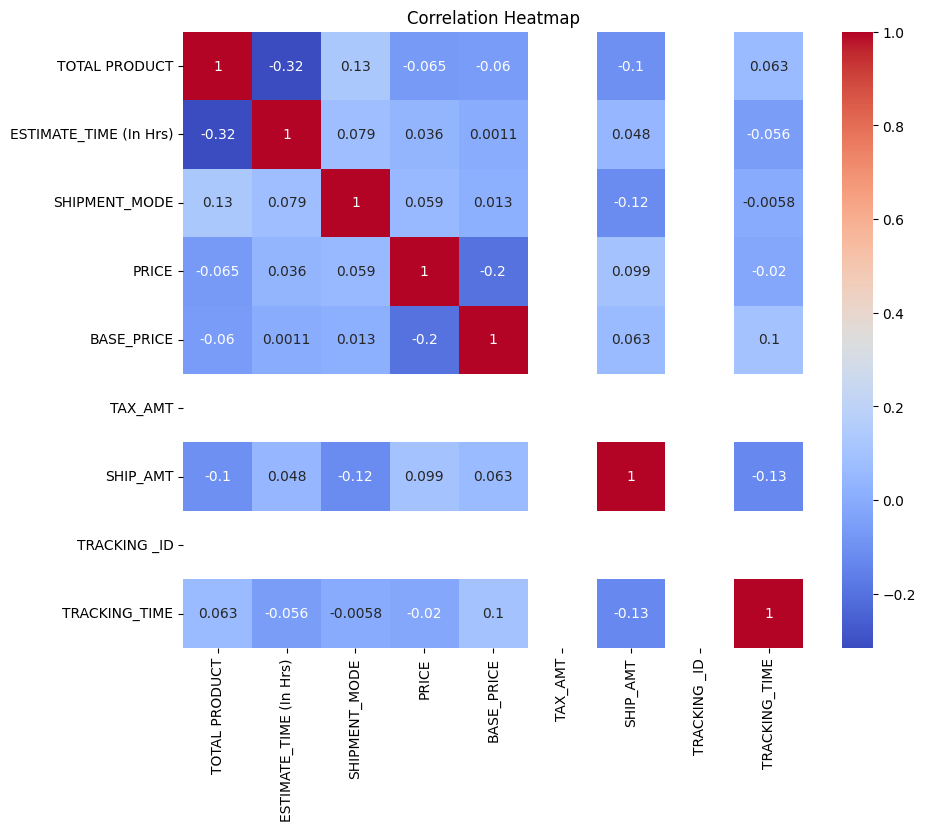

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

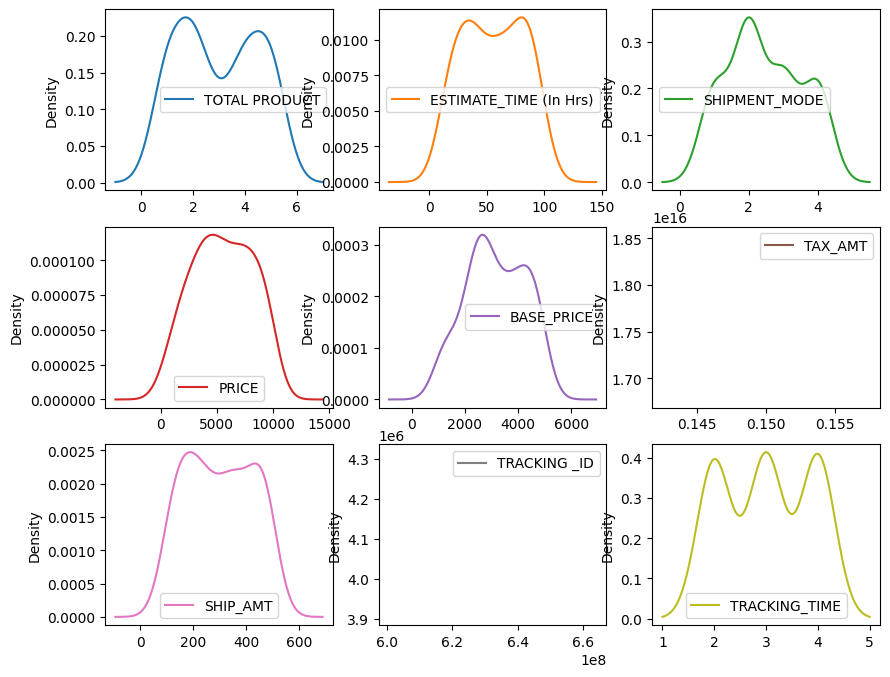

In [ ]:
numeric_data.plot(kind='density', subplots=True, layout=(3, 3), figsize=(10, 8), sharex=False)
plt.show()

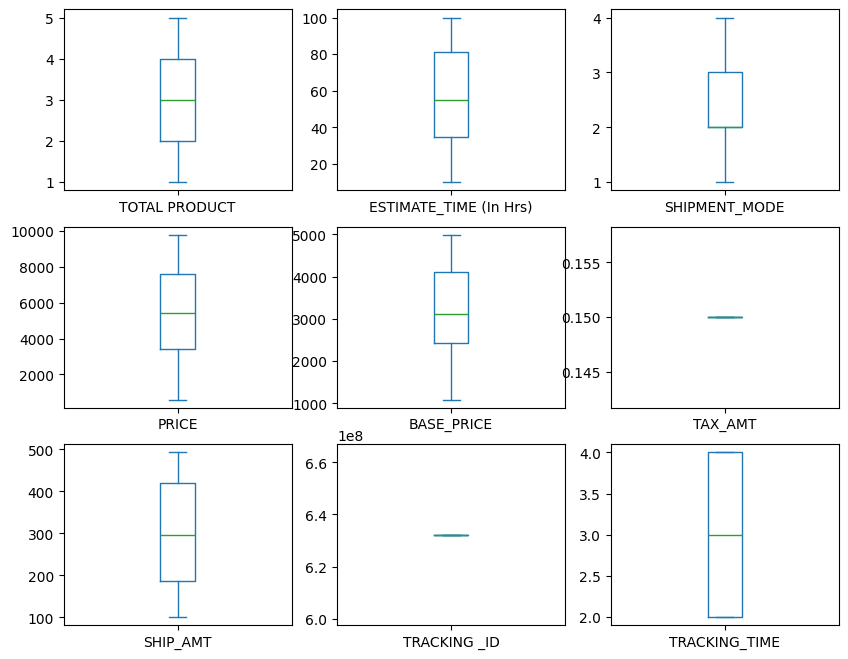

In [ ]:
numeric_data.plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 8), sharex=False)
plt.show()

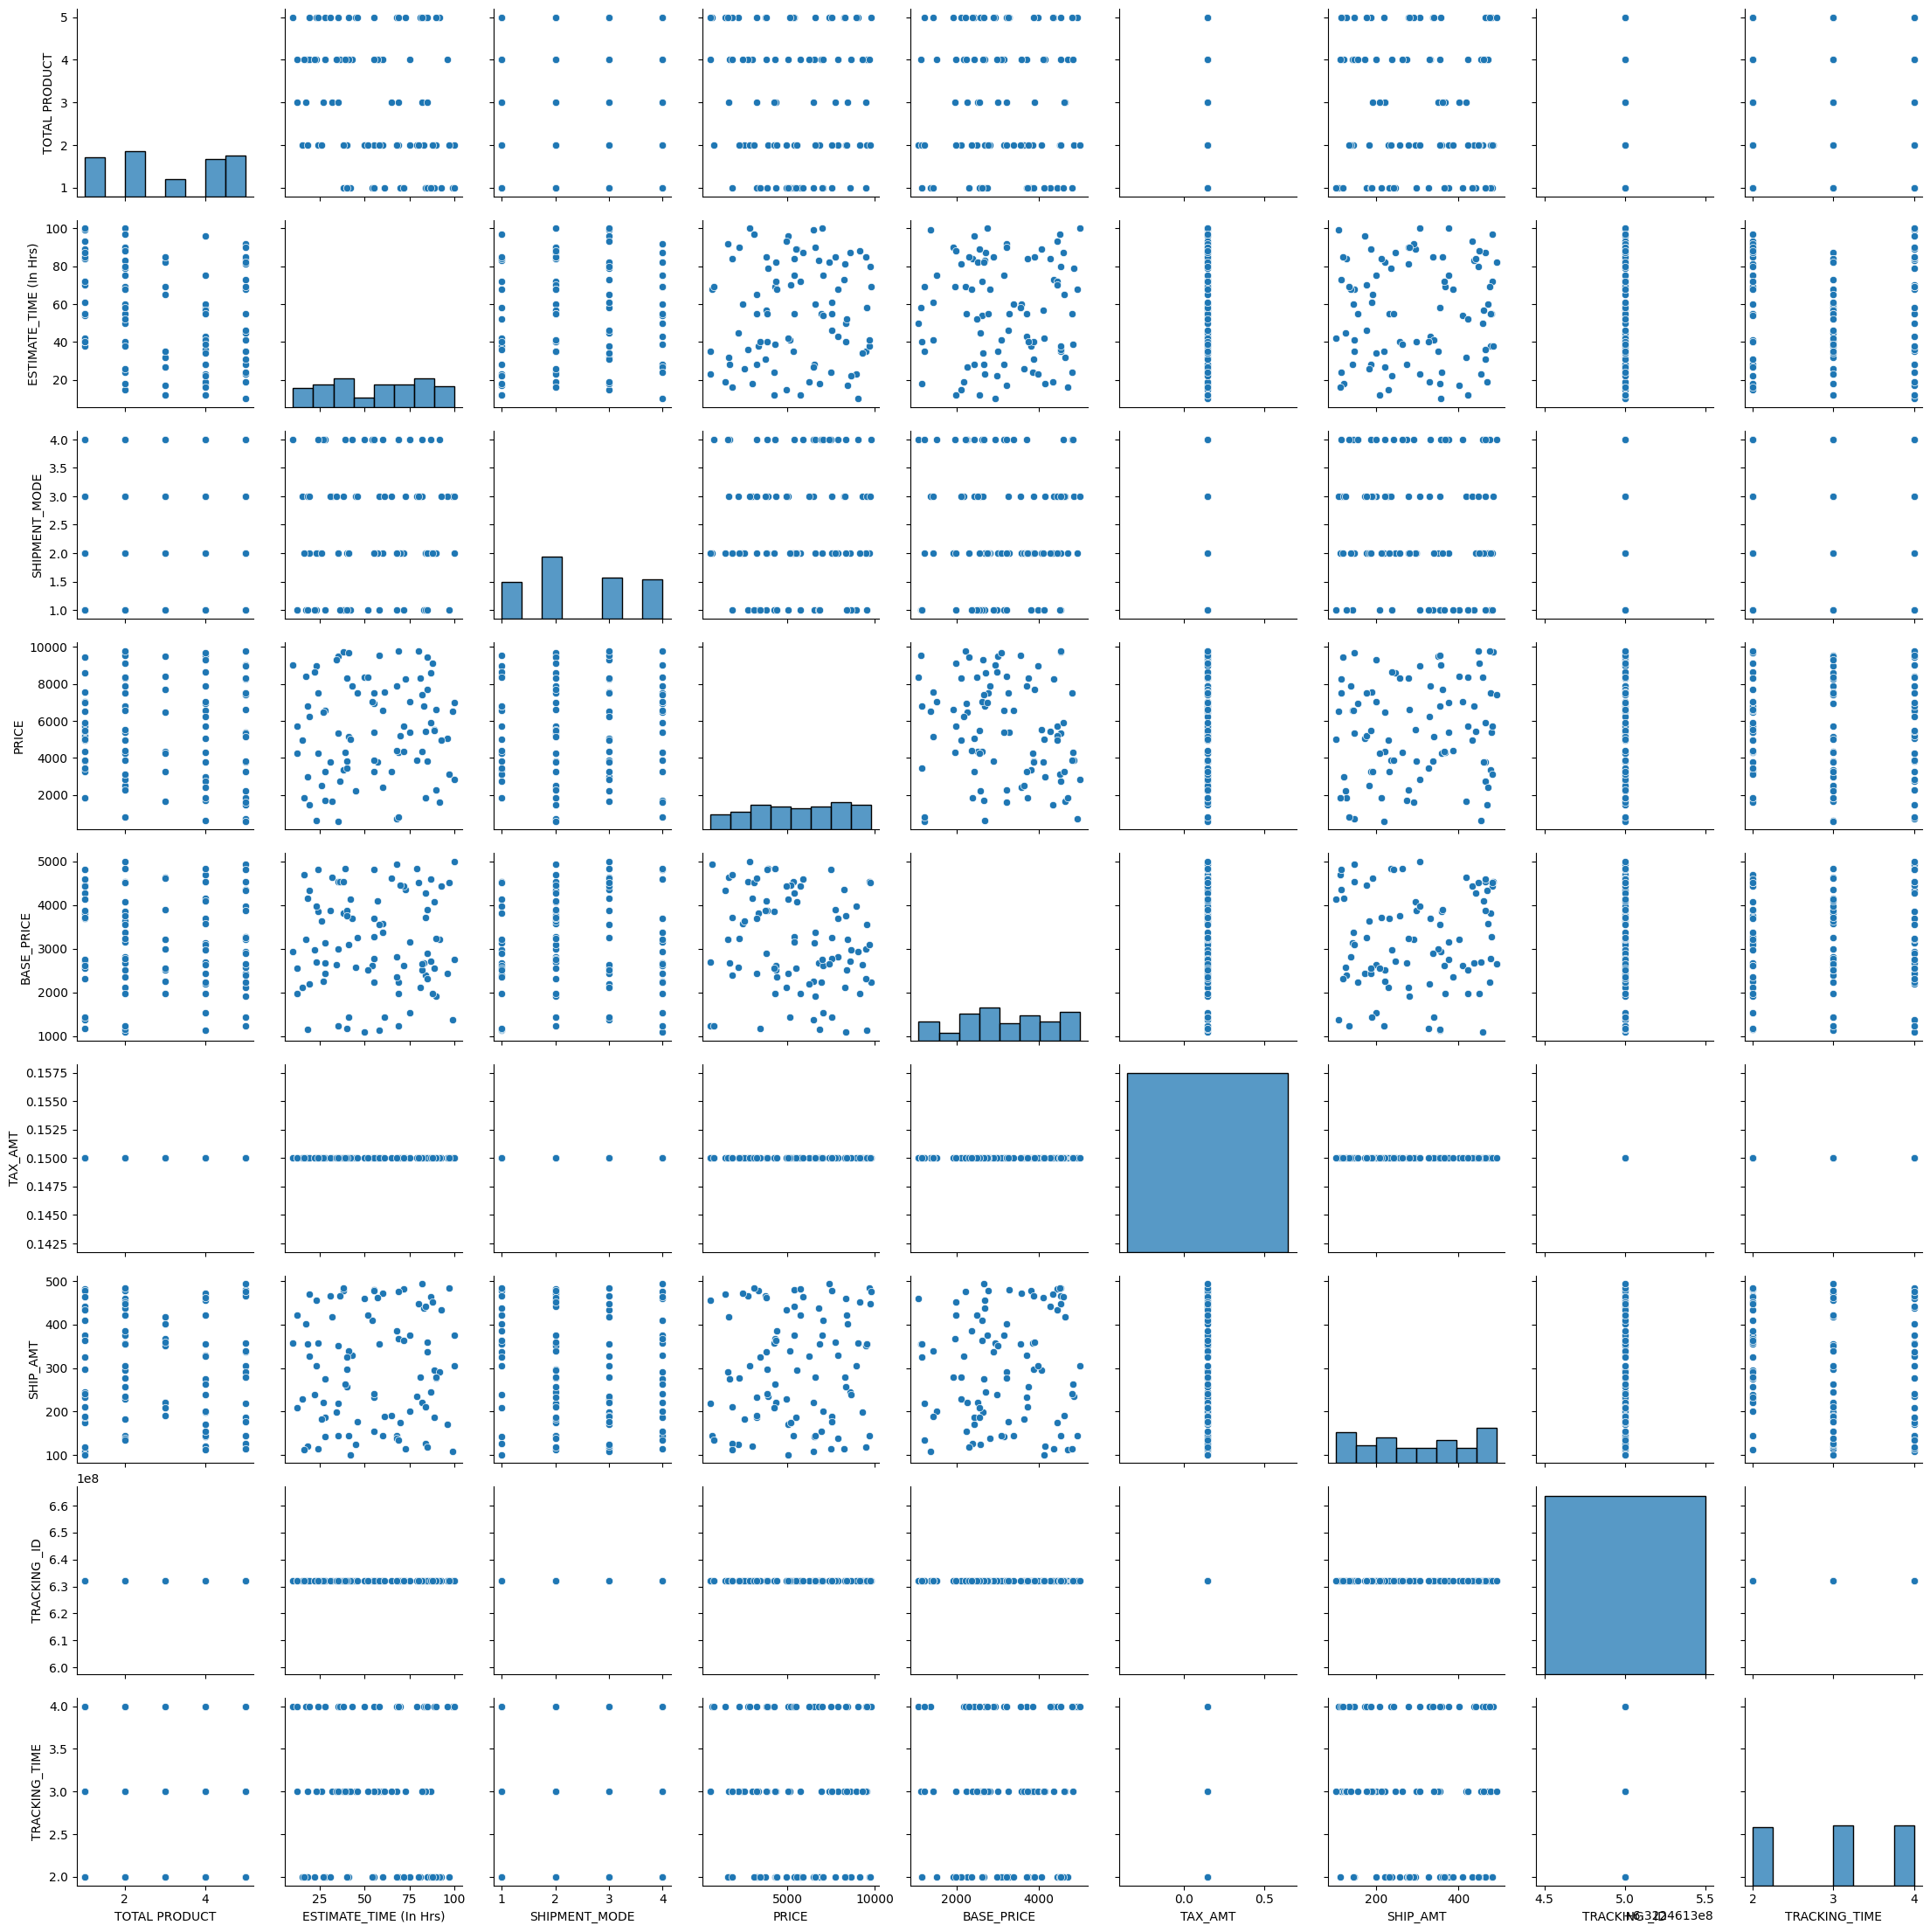

In [ ]:
sns.pairplot(numeric_data)
plt.show()

# Data Cleaning

In [ ]:
# Remove variables with only one unique value
data = data.loc[:, data.nunique() > 1]
data = data.drop(columns=['MEMBER_ID', 'ORDER_ID', 'TRADING_ID'], errors='ignore')

# Train-Test Split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop(columns=['DATE', 'ORDER_CREATED'])
X_test = X_test.drop(columns=['DATE', 'ORDER_CREATED'])


# Scaling the Features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Scaled training data shape: {X_train_scaled.shape}, Scaled test data shape: {X_test_scaled.shape}")

Scaled training data shape: (3, 2), Scaled test data shape: (1, 2)


Cross-Validation

###### Linear Regression Model

In [ ]:
lm = LinearRegression()
lm_scores = cross_val_score(lm, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
lm_rmse = np.sqrt(-lm_scores)
print(f"Linear Regression RMSE: {lm_rmse.mean()}")


Linear Regression RMSE: 1.2222222222222217


### Support Vector Machine (SVM)

In [ ]:
svm = SVR(kernel='rbf')
svm_scores = cross_val_score(svm, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
svm_rmse = np.sqrt(-svm_scores)
print(f"SVM RMSE: {svm_rmse.mean()}")

SVM RMSE: 0.730796846646249


### K-Nearest Neighbors Model

In [ ]:
knn = KNeighborsRegressor()
knn_scores = cross_val_score(knn, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
knn_rmse = np.sqrt(-knn_scores)
print(f"KNN RMSE: {knn_rmse.mean()}")

KNN RMSE: nan


# Model Comparison

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'KNN'],
    'RMSE Mean': [lm_rmse.mean(), svm_rmse.mean(), knn_rmse.mean()],
    'RMSE Std': [lm_rmse.std(), svm_rmse.std(), knn_rmse.std()]
})

print(results)

               Model  RMSE Mean  RMSE Std
0  Linear Regression   1.222222  0.566558
1                SVM   0.730797  0.205923
2                KNN        NaN       NaN


# Visualizing

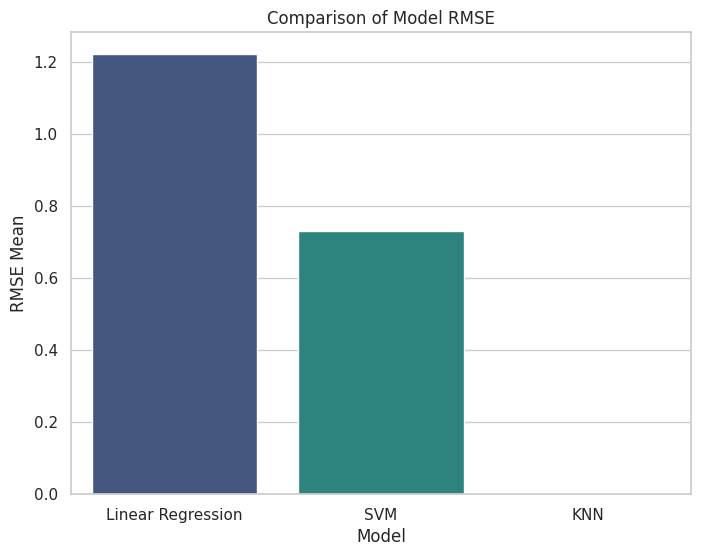

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='RMSE Mean', data=results, palette='viridis')
plt.title('Comparison of Model RMSE')
plt.show()